In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.basemap import Basemap
import os

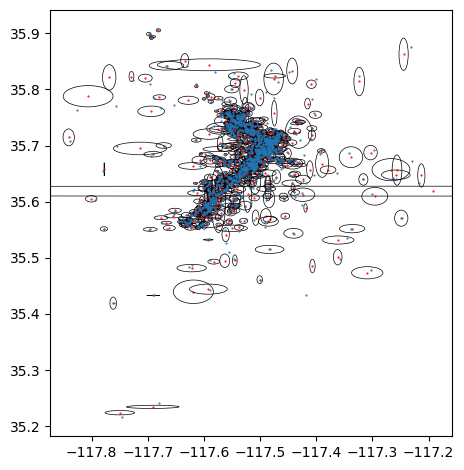

In [2]:
N = 50
M = 2001
# Custom function to handle non-numeric values
def safe_float_convert(x):
    try:
        return float(x)
    except ValueError:
        return np.nan  # Replace non-convertible values with NaN
        
hypo = np.loadtxt('hypoDD/hypoDD.reloc', usecols=(0,1,2,3))
id = np.array([int(l)-1 for l in hypo[:,0]])
hx = hypo[:,2]
hy = hypo[:,1]
hz = hypo[:,3]

# initialize matrix
X = np.zeros((M,N))
Y = np.zeros((M,N))
Z = np.zeros((M,N))

for i in range(N):
    filepath = 'hypoDD/bootstrap/hasil/hypoDD' + str(i) + '.reloc'

    # Check if the file exists and is not empty
    if os.path.exists(filepath) and os.path.getsize(filepath) > 0:
        data = np.loadtxt(filepath, usecols=(0,1,2,3), converters={i: safe_float_convert for i in range(4)})
        idx = np.array([int(l)-1 for l in data[:,0] if l != 9999])
        X[idx,i] = data[:,2]
        Y[idx,i] = data[:,1]
        Z[idx,i] = data[:,3]
    # else:
    #     print(f"Warning: File {filepath} does not exist or is empty.")

X[X==0]=9999
Y[Y==0]=9999
Z[Z==0]=9999

## MapView
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
relative_error = open('relative_error.txt', 'w+')
relative_error.write('x_err'+'\t'+'y_err'+'\t'+'z_err'+'\n')
ll = 0
for mm in id:
    x = X[mm,:]
    y = Y[mm,:]
    z = Z[mm,:]

    x = np.delete(x, np.where(x==9999))
    y = np.delete(y, np.where(y==9999))
    z = np.delete(z, np.where(z==9999))
    
    # Remove NaN or Inf values
    valid_indices = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(z) & ~np.isinf(x) & ~np.isinf(y) & ~np.isinf(z)
    x = x[valid_indices]
    y = y[valid_indices]
    z = z[valid_indices]

    # Check if arrays are empty after removals
    if x.size == 0 or y.size == 0 or z.size == 0:
        # Skip this iteration if arrays are empty
        continue
    if x.size < 2 or y.size < 2 or z.size < 2:
        continue

    try:
        # Calculate covariance and perform eigenvalue decomposition
        cov = np.cov(x,y)
        lambda_, v = np.linalg.eig(cov)
        lambda2 = np.sqrt(lambda_)
        # ... [rest of the calculations for xy, xz, and yz]
        cov = np.cov(x,z)    
        lambda_, v = np.linalg.eig(cov)
        lambdaz1 = np.sqrt(lambda_)
        
        cov = np.cov(y,z)
        lambda_, v = np.linalg.eig(cov)
        lambdaz2 = np.sqrt(lambda_)
    except np.linalg.LinAlgError:
        # Handle the case where covariance matrix is singular
        # For example, skip this iteration or log a warning
        continue
        



    tempx = lambda2[0] * 111.11
    tempy = lambda2[1] * 111.11
    tempz = (lambdaz1[1] + lambdaz2[1])*0.5

    relative_error.write(str(tempx)+'\t'+str(tempy)+'\t'+str(tempz)+'\n')

    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                      width=lambda2[0]*2*2, height=lambda2[1]*2*2,
                      angle=-np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('k')
    ell.set_linewidth(0.5)
    ax.add_artist(ell)
    ax.scatter(np.mean(x), np.mean(y), 0.3, 'r')
    # ax.scatter(x,y,2, marker='+', color='b')
    ll += 1
relative_error.close()
plt.scatter(hx,hy, s=0.3)
# # ax.set_xlabel('Longitude [$^o$]')
# # ax.set_ylabel('Latitude [$^o$]')
#ax.set_xlim(np.min(hx), np.max(hx))
#ax.set_ylim(0, 50)
# m = Basemap(llcrnrlat=-3,urcrnrlat=1,\
#             llcrnrlon=119,urcrnrlon=121.5,lat_ts=1,resolution='h', ax=ax)
# m.drawcoastlines(linewidth=0.4)
# m.fillcontinents(color='lightgray',lake_color='white')
# m.drawmapboundary(fill_color='white')
# m.drawparallels(np.arange(-3,1,1),labels=[1,0,0,0], linewidth=0.0)
# m.drawmeridians(np.arange(119,121.5,1),labels=[0,0,0,1], linewidth=0.0)
# fig.savefig('MapView_bootstrap1.png', fmt='png', dpi=500, bbox_inches='tight')
plt.tight_layout()
plt.show()

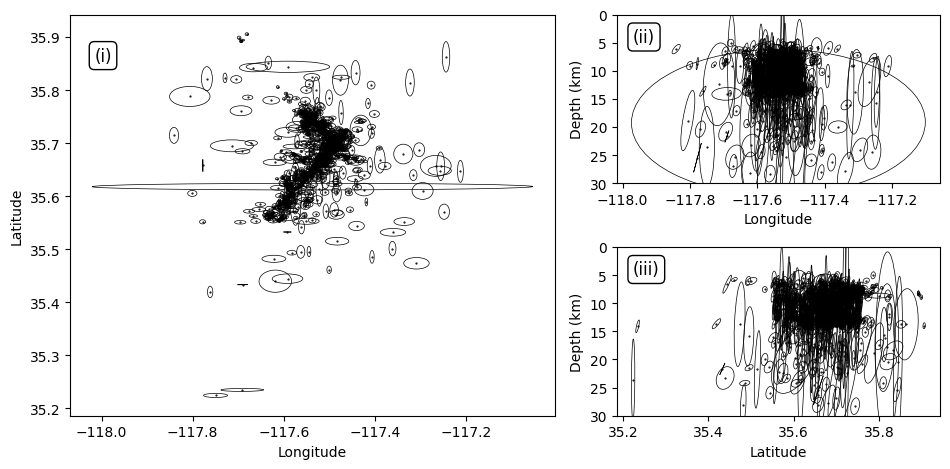

In [3]:
N = 50
M = 2001
# Custom function to handle non-numeric values
def safe_float_convert(x):
    try:
        return float(x)
    except ValueError:
        return np.nan  # Replace non-convertible values with NaN
        
hypo = np.loadtxt('hypoDD/hypoDD.reloc', usecols=(0,1,2,3))
id = np.array([int(l)-1 for l in hypo[:,0]])
hx = hypo[:,2]
hy = hypo[:,1]
hz = hypo[:,3]

# initialize matrix
X = np.zeros((M,N))
Y = np.zeros((M,N))
Z = np.zeros((M,N))

for i in range(N):
    filepath = 'hypoDD/bootstrap/hasil/hypoDD' + str(i) + '.reloc'

    # Check if the file exists and is not empty
    if os.path.exists(filepath) and os.path.getsize(filepath) > 0:
        data = np.loadtxt(filepath, usecols=(0,1,2,3), converters={i: safe_float_convert for i in range(4)})
        idx = np.array([int(l)-1 for l in data[:,0] if l != 9999])
        X[idx,i] = data[:,2]
        Y[idx,i] = data[:,1]
        Z[idx,i] = data[:,3]

X[X==0]=9999
Y[Y==0]=9999
Z[Z==0]=9999

## MapView
fig = plt.figure(figsize=plt.rcParams["figure.figsize"] * np.array([1.5, 1]))
box = dict(boxstyle='round', facecolor='white', alpha=1)
grd = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[1.5, 1], height_ratios=[1, 1])

text_loc = [0.05, 0.92]
ax1 = fig.add_subplot(grd[:, 0])
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
plt.text(text_loc[0], text_loc[1], '(i)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.gca().set_prop_cycle(None)

ax2 = fig.add_subplot(grd[0, 1])
ax2.invert_yaxis()
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Depth (km)")
plt.text(text_loc[0], text_loc[1], '(ii)', horizontalalignment='left', verticalalignment="top",
         transform=ax2.transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.gca().set_prop_cycle(None)

ax3 = fig.add_subplot(grd[1, 1])
ax3.invert_yaxis()
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Depth (km)")
plt.text(text_loc[0], text_loc[1], '(iii)', horizontalalignment='left', verticalalignment="top",
         transform=ax3.transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.gca().set_prop_cycle(None)

relative_error = open('relative_error.txt', 'w+')
relative_error.write('x_err'+'\t'+'y_err'+'\t'+'z_err'+'\n')
ll = 0
depth = []
long = []
lat = []

el_x = []
el_y = []
el_z = []
el_angle = []
for mm in id:
    x = X[mm,:]
    y = Y[mm,:]
    z = Z[mm,:]

    x = np.delete(x, np.where(x==9999))
    y = np.delete(y, np.where(y==9999))
    z = np.delete(z, np.where(z==9999))

    
    indeks_hapus = np.where(z >= 50)
    # Hapus nilai pada indeks yang sama dari x, y, dan z
    x = np.delete(x, indeks_hapus)
    y = np.delete(y, indeks_hapus)
    z = np.delete(z, indeks_hapus)

    indeks_hapus = np.where(x > -117)
    # Hapus nilai pada indeks yang sama dari x, y, dan z
    x = np.delete(x, indeks_hapus)
    y = np.delete(y, indeks_hapus)
    z = np.delete(z, indeks_hapus)
    
    # Remove NaN or Inf values
    valid_indices = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(z) & ~np.isinf(x) & ~np.isinf(y) & ~np.isinf(z)
    x = x[valid_indices]
    y = y[valid_indices]
    z = z[valid_indices]

    # Check if arrays are empty after removals
    if x.size == 0 or y.size == 0 or z.size == 0:
        continue
    if x.size < 2 or y.size < 2 or z.size < 2:
        continue

    try:
        cov = np.cov(x,y)
        lambda_, v = np.linalg.eig(cov)
        lambda2 = np.sqrt(lambda_)

    except np.linalg.LinAlgError:
        continue
        
    cov = np.cov(x,z)    
    lambda_, v = np.linalg.eig(cov)
    lambdaz1 = np.sqrt(lambda_)

    cov = np.cov(y,z)
    lambda_, v = np.linalg.eig(cov)
    lambdaz2 = np.sqrt(lambda_)
        
    tempx = lambda2[0] * 111.11
    tempy = lambda2[1] * 111.11
    tempz = (lambdaz1[1] + lambdaz2[1])*0.5
    
    depth.append(np.mean(z))
    long.append(np.mean(x))
    lat.append(np.mean(y))
    
    relative_error.write(str(tempx)+'\t'+str(tempy)+'\t'+str(tempz)+'\n')
    #print(x)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                      width=lambda2[0]*2*2, height=lambda2[1]*2*2,
                      angle=-np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('k')
    ell.set_linewidth(0.5)
    ax1.add_patch(ell)
    ax1.scatter(np.mean(x), np.mean(y),s=0.3, c='k')
    
    ell2 = Ellipse(xy=(np.mean(x), np.mean(z)),
                      width=lambdaz1[0]*2*2, height=lambdaz1[1]*2*2,
                      angle=-np.rad2deg(np.arccos(v[0, 0])))
    ell2.set_facecolor('none')
    ell2.set_edgecolor('k')
    ell2.set_linewidth(0.5)
    ax2.add_patch(ell2)
    ax2.scatter(np.mean(x), np.mean(z),s=0.3, c='k')

    ell3 = Ellipse(xy=(np.mean(y), np.mean(z)),
                      width=lambdaz2[0]*2*2, height=lambdaz2[1]*2*2,
                      angle=-np.rad2deg(np.arccos(v[0, 0])))
    ell3.set_facecolor('none')
    ell3.set_edgecolor('k')
    ell3.set_linewidth(0.5)
    ax3.add_patch(ell3)
    ax3.scatter(np.mean(y), np.mean(z),s=0.3, c='k')

    el_x.append(lambda2[0])
    el_y.append(lambda2[1])
    el_z.append((lambdaz1[1] + lambdaz2[1])*0.5)
    el_angle.append(-np.rad2deg(np.arccos(v[0, 0])))
    ll += 1

relative_error.close()

ax2.set_ylim(30,0)
ax3.set_ylim(30,0)
plt.tight_layout()
plt.savefig("bootstraping.png", dpi=500)
plt.show()

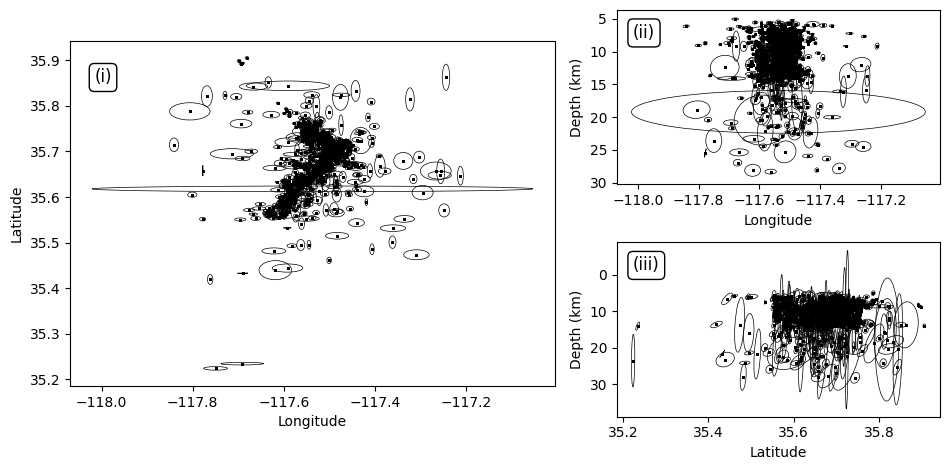

In [4]:
fig = plt.figure(figsize=plt.rcParams["figure.figsize"] * np.array([1.5, 1]))
box = dict(boxstyle='round', facecolor='white', alpha=1)
text_loc = [0.05, 0.92]
grd = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[1.5, 1], height_ratios=[1, 1])

ax1 = fig.add_subplot(grd[:, 0])
for i in range(len(el_x)):
    el1 = Ellipse(xy=(long[i], lat[i]),
                      width=np.array(el_x[i])*2*2, height=np.array(el_y[i])*2*2,
                      angle=np.array(el_angle[i]))
    el1.set_facecolor('none')
    el1.set_edgecolor('k')
    el1.set_linewidth(0.5)
    ax1.add_patch(el1)
    ax1.scatter(long, lat,s=0.3, c='k')

plt.text(text_loc[0], text_loc[1], '(i)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.axis("scaled")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.gca().set_prop_cycle(None)


ax2 = fig.add_subplot(grd[0, 1])
for i in range(len(el_x)):
    el2 = Ellipse(xy=(long[i], depth[i]),
                      width=np.array(el_x[i])*2*2, height=np.array(el_z[i]),
                      angle=np.array(el_angle[i]))
    el2.set_facecolor('none')
    el2.set_edgecolor('k')
    el2.set_linewidth(0.5)
    ax2.add_patch(el2)
    ax2.scatter(long, depth,s=0.3, c='k')

plt.text(text_loc[0], text_loc[1], '(ii)', horizontalalignment='left', verticalalignment="top",
         transform=ax2.transAxes, fontsize="large", fontweight="normal", bbox=box)
plt.gca().invert_yaxis()
plt.xlabel("Longitude")
plt.ylabel("Depth (km)")
plt.tight_layout()
plt.gca().set_prop_cycle(None)


ax3 = fig.add_subplot(grd[1, 1])
for i in range(len(el_x)):
    el3 = Ellipse(xy=(lat[i], depth[i]),
                      width=np.array(el_y[i])*2*2, height=np.array(el_z[i])*2*2,
                      angle=np.array(el_angle[i]))
    el3.set_facecolor('none')
    el3.set_edgecolor('k')
    el3.set_linewidth(0.5)
    ax3.add_patch(el3)
    ax3.scatter(lat, depth,s=0.3, c='k')

plt.text(text_loc[0], text_loc[1], '(iii)', horizontalalignment='left', verticalalignment="top",
         transform=ax3.transAxes, fontsize="large", fontweight="normal", bbox=box)

plt.gca().invert_yaxis()
plt.xlabel("Latitude")
plt.ylabel("Depth (km)")
plt.tight_layout()
plt.gca().set_prop_cycle(None)

plt.show()

In [16]:
import pandas as pd
df = pd.read_csv('relative_error.txt', sep='\t')
df.head()

,x_err,y_err,z_err
0,0.149712,0.110879,0.206090
1,0.359340,0.105296,0.330163
2,0.769920,0.174369,0.498115
3,0.175469,0.098964,0.283498
4,0.777863,0.131554,0.359680


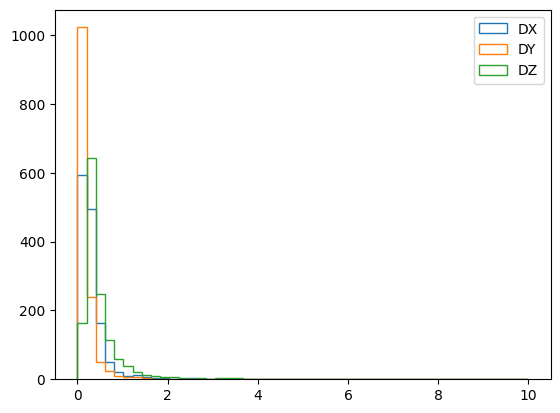

In [33]:
bins = np.linspace(0,10,50)
plt.hist(df.x_err, bins=bins, histtype='step', label="DX")
plt.hist(df.y_err, bins=bins, histtype='step', label="DY")
plt.hist(df.z_err, bins=bins, histtype='step', label="DZ")
plt.legend()
plt.show()